Ecological Tipping Points using TRPO

In [1]:
import numpy as np
import stable_baselines3 as sb3
import gym
import gym_conservation
from sb3_contrib import TRPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor

In [2]:
algo = "TRPO"
env_id = "conservation-v6"
team = "team_cboettig"
agent_id = env_id + "-" + algo + "-" + team
agent_id

'conservation-v6-TRPO-team_cboettig'

In [3]:
seed = 24
np.random.seed(seed)

In [4]:
env = gym.make(env_id)

In [5]:

model = TRPO("MlpPolicy", env = env, verbose=0, tensorboard_log="/var/log/tensorboard/conservation-v6")

In [6]:
if not os.path.exists((agent_id+".zip")):
    model.learn(total_timesteps=3000000)
    model.save(agent_id)

In [7]:
model = TRPO.load(agent_id)

score = evaluate_policy(model, Monitor(env), n_eval_episodes=10)
score

(46.8158493, 4.587082736626777)

In [8]:
sims = env.simulate(model, reps=100)
policy = env.policyfn(model, reps=10)

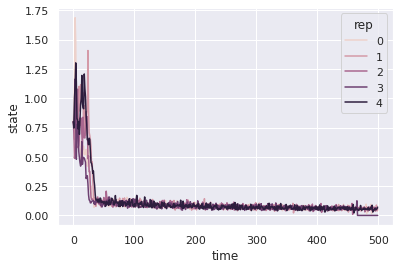

In [9]:
import seaborn as sns
sns.set_theme(style="darkgrid")
rep0 = sims.query("rep < 5")

sns.lineplot(x="time", y="state", hue = "rep", data=rep0)

df = rep0.melt(id_vars=['time','rep'],var_name='metric', value_name='values')
#sns.lineplot( x="time", y="values", hue="metric", data = df)


<AxesSubplot:xlabel='state', ylabel='action'>

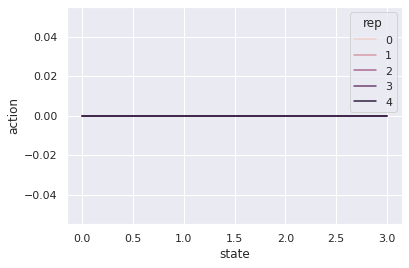

In [10]:
df = policy.query("rep < 5")
sns.lineplot(data = df, x="state", y="action", hue = "rep")